In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Epoch [5/60], Loss: 9.1160
Parameter containing:
tensor([[-0.1714]], requires_grad=True)
Parameter containing:
tensor([0.8267], requires_grad=True)


Epoch [10/60], Loss: 3.7950
Parameter containing:
tensor([[-0.0217]], requires_grad=True)
Parameter containing:
tensor([0.8480], requires_grad=True)


Epoch [15/60], Loss: 1.6394
Parameter containing:
tensor([[0.0735]], requires_grad=True)
Parameter containing:
tensor([0.8615], requires_grad=True)


Epoch [20/60], Loss: 0.7661
Parameter containing:
tensor([[0.1341]], requires_grad=True)
Parameter containing:
tensor([0.8700], requires_grad=True)


Epoch [25/60], Loss: 0.4123
Parameter containing:
tensor([[0.1727]], requires_grad=True)
Parameter containing:
tensor([0.8754], requires_grad=True)


Epoch [30/60], Loss: 0.2690
Parameter containing:
tensor([[0.1973]], requires_grad=True)
Parameter containing:
tensor([0.8787], requires_grad=True)


Epoch [35/60], Loss: 0.2109
Parameter containing:
tensor([[0.2129]], requires_grad=True)
Parameter 

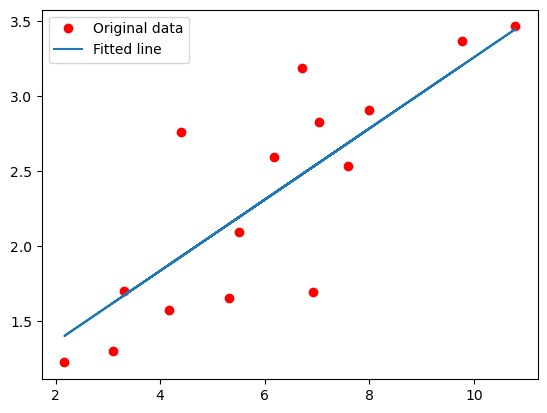

In [2]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize。不断调整 model 中的权重与偏置，使得 loss 最小
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))
        for param in model.parameters():
            print(param)
        print('\n')

print("Latest model parameters:")
# 第一个 tensor 是权重，第二个 tensor 是偏置
for param in model.parameters():
    print('\t', param)

predicted = model(torch.from_numpy(x_train)).detach().numpy()
print('\npredicted: ', predicted)

# Plot the graph
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

按照机器学习的三个基本要素分析上述的代码：
1. 模型：即上述的线性模型：`nn.Linear`
2. 学习准则：即上述的损失函数：`nn.MSELoss`
3. 优化算法：即上述的随机梯度下降算法：`torch.optim.SGD`，用于优化调整模型中的参数，使得损失函数最小

In [20]:
# 演示 MSELoss 的使用

crit = nn.MSELoss()  # 均方损失函数
target = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float, requires_grad=True)
pred = torch.tensor([[7, 8, 9], [8, 4, 3]], dtype=torch.float, requires_grad=True)
# target = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])
# pred = torch.FloatTensor([[7, 8, 9], [8, 4, 3]])

loss = crit(pred, target)  # 将pred,target逐个元素求差,然后求平方,再求和,再求均值
print(loss)
# loss.backward()
# print(loss.item())

sum = 0
for i in range(2):  # 遍历行i
    for j in range(3):  # 遍历列
        sum += (target[i][j] - pred[i][j]) * (target[i][j] - pred[i][j])  # 对应元素做差,然后平方和

print(sum / 6)  # 除以元素个数

tensor(22.3333, grad_fn=<MseLossBackward0>)
tensor([[-0.2315,  0.9000, -1.9404],
        [-0.9342,  1.9783, -4.3228]], grad_fn=<AddmmBackward0>)
tensor(22.3333, grad_fn=<DivBackward0>)


In [30]:
# 演示 Linear 的使用

model = nn.Linear(2, 1)  # 输入特征数为2，输出特征数为1

input = torch.Tensor([1, 2])  # 样本数据，有两个特征（两个特征值分别是1和2）
output = model(input)  # 将样本输入给模型，输出预测值
print('output: ', output)

# 查看模型参数
for param in model.parameters():
    print(param)

output:  tensor([1.3500], grad_fn=<AddBackward0>)
Parameter containing:
tensor([[0.5307, 0.3840]], requires_grad=True)
Parameter containing:
tensor([0.0514], requires_grad=True)


torch.nn.Linear(in_features, # 输入特征数
           out_features, # 输出特征数
           bias=True # 是否包含偏置
           )

Linear 是对输入进行了线性变换，即：
$$ Y_n_×_o = X_n_×_i W_i_×_o + b $$

其中，$X_n_×_i$ 是输入，$W_i_×_o$ 是权重，$b$ 是偏置，$Y_n_×_o$ 是输出，$n$ 是样本数（输入向量行数），$i$ 是输入特征数，$o$ 是输出特征数。

上述例子，模型有 3 个参数，分别是 w1、w2 和 b，其中 w1 和 w2 是权重，b 是偏置：

$$y=[特征值1,特征值2] * [w_1,w_2]^{\scriptscriptstyle T} + b $$

以下进行演示：

In [36]:
X = torch.Tensor([
    [0.1, 0.2, 0.3, 0.3, 0.3],
    [0.4, 0.5, 0.6, 0.6, 0.6],
    [0.7, 0.8, 0.9, 0.9, 0.9],
])
print(X)  # 输入向量，3个样本，每个样本5个特征值

in_feature = 5  # 输入特征数
out_feature = 10  # 输出特征数

tensor([[0.1000, 0.2000, 0.3000, 0.3000, 0.3000],
        [0.4000, 0.5000, 0.6000, 0.6000, 0.6000],
        [0.7000, 0.8000, 0.9000, 0.9000, 0.9000]])


将上述值套入公式，即
$ Y_3_×_1_0 = X_3_×_5 W_5_×_1_0 + b $

有三个样本，所以相当于依次进行了三次 $ Y_1_×_1_0 = X_1_×_5 W_5_×_1_0 + b $，然后将三个 $Y_1_×_1_0$ 合并成 $Y_3_×_1_0$。

In [35]:
model = nn.Linear(in_features=5, out_features=10, bias=True)
model(X).size()

torch.Size([3, 10])